Numerical Method: 1-Jacobi, 2-Gauss-Seidel, 3-SOR: 1
Enter number of grid points on a side: 50
 Enter a 1 to animate while iterating:0
Enter 1 for Dirchlet Boundary Conditions, 2 for Neumann Boundary Conditions:2
Potential at y=L equals  1
Potential is zero on all other boundaries
Desired fractional change =  0.0001
After 0 iterations, fractional change = 0.061224
After 10 iterations, fractional change = 0.007176
After 20 iterations, fractional change = 0.005667
After 30 iterations, fractional change = 0.004803
After 40 iterations, fractional change = 0.004234
After 50 iterations, fractional change = 0.003823
After 60 iterations, fractional change = 0.003508
After 70 iterations, fractional change = 0.003258
After 80 iterations, fractional change = 0.003052
After 90 iterations, fractional change = 0.002878
After 100 iterations, fractional change = 0.002730
After 110 iterations, fractional change = 0.002601
After 120 iterations, fractional change = 0.002487
After 130 iterations, fraction

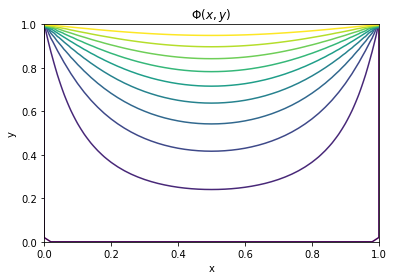

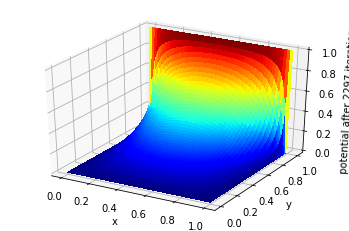

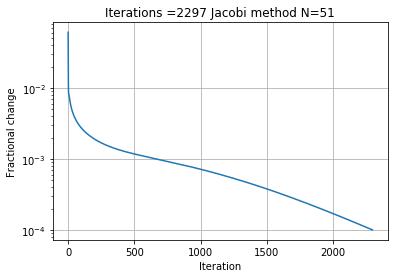

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# relaxa - Program to solve the Laplace equation using
# Jacobi, Gauss-Seidel and SOR methods on a square grid
# modified to record total cpu time
# this version makes an animation as it iterates
# clear all help relaxa  # Clear memory and print header

#* Initialize parameters (system size, grid spacing, etc.)
method = int(input('Numerical Method: 1-Jacobi, 2-Gauss-Seidel, 3-SOR: '))
N = int(input('Enter number of grid points on a side: '))
animate=int(input(' Enter a 1 to animate while iterating:'))
bnd_conds = int(input("Enter 1 for Dirchlet Boundary Conditions, 2 for Neumann Boundary Conditions:"))


if bnd_conds == 1:
    L = 1          # System size (length)
    h = L/(N-1)    # Grid spacing
    x = np.arange(0,N)*h   # x coordinate
    y = np.arange(0,N)*h # y coordinate
    yy,xx = np.meshgrid(x,y) # for plotting, note the reversal in x and y
    plot_interval =50 # interval to plot animation, setting it smaller slows the program down alot

    #* Select over-relaxation factor (SOR only)
    if( method == 3 ):
      omegaOpt = 2./(1.+np.sin(np.pi/N))  # Theoretical optimum
      print('Theoretical optimum omega = ',omegaOpt)
      omega = float(input('Enter desired omega: '))
    
    #* Set initial guess as first term in separation of variables soln.
    phi0 = 1     # Potential at y=L
    # phi = phi0 * 4/(np.pi*np.sinh(np.pi)) * np.outer(np.sin(np.pi*x/L),np.sinh(np.pi*y/L))
    phi=np.ones((N,N)) # try this to see it evolve better
    
    #* Set boundary conditions
    # first index is the row and second index is column
    phi[0,:] = 0
    phi[-1,:] = 0
    phi[:,0] = 0
    phi[:,-1] = phi0*np.ones(N)
    print('Potential at y=L equals ',phi0)
    print('Potential is zero on all other boundaries')
    
    #plt.ion()

    #* Loop until desired fractional change per iteration is obtained
    # start_time=cputime     # Reset the cputime counter
    newphi = np.copy(phi)           # Copy of the solution (used only by Jacobi)
    iterMax = N**2          # Set max to avoid excessively long runs
    changeDesired = 1.0e-4   # Stop when the change is given fraction
    print('Desired fractional change = ',changeDesired)
    change = np.array([])
    
    for iter in range(0,iterMax):
      changeSum = 0.0
      
      if( method == 1 ):      ## Jacobi method ##
        for i in range(1,N-1):        # Loop over interior points only
         for j in range(1,N-1):
           newphi[i,j] = .25*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])
           changeSum = changeSum + abs(1-phi[i,j]/newphi[i,j])
        phi = np.copy(newphi)
    	
      elif( method == 2 ):  ## G-S method ##
        for i in range(1,N-1):        # Loop over interior points only
         for j in range(1,N-1):
           newphi = .25*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])
           changeSum = changeSum + abs(1-phi[i,j]/newphi)
           phi[i,j] = newphi
    
      else:                  ## SOR method ##
        for i in range(1,N-1):        # Loop over interior points only
         for j in range(1,N-1):
           newphi = 0.25*omega*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])  +  (1-omega)*phi[i,j]
           changeSum = changeSum + abs(1-phi[i,j]/newphi)
           phi[i,j] = newphi
    
      #* Check if fractional change is small enough to halt the iteration
      change = np.append(change,changeSum/(N-2)**2)
      if( iter%10 < 1 ):
        print('After %d iterations, fractional change = %f'%( iter,change[-1]))
    
      if( change[-1] < changeDesired ):
        print('Desired accuracy achieved after %d iterations'%iter)
        print('Breaking out of main loop')
        break
    # animate
      if(animate ==1 and iter%plot_interval<1):
          fig = plt.figure(2)   # Clear figure 2 window and bring forward
          plt.clf()
          ax = fig.gca(projection='3d')
          surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
          ax.set_xlabel('x')
          ax.set_ylabel('y')
          ax.set_zlabel('potential after '+str(iter)+' iterations')
          plt.draw()
          plt.show()
          plt.pause(0.1)
    
    # total_time = cputime - start_time # get the total cpu time
    
    #* Plot final estimate of potential as contour and surface plots
    
    #plt.ioff()
    
    plt.figure(1);plt.clf()
    contourLevels = np.arange(0,1,0.1) #
    plt.contour(xx,yy,phi,contourLevels)  # Contour plot
    # clabel(cs,contourLabels)  # Add labels to selected contour levels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'$\Phi(x,y)$')
    
    fig = plt.figure(2)   # Clear figure 2 window and bring forward
    plt.clf()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('potential after '+str(iter)+' iterations')
    
    #* Plot the fractional change versus iteration
    plt.figure(3); 
    plt.clf()
    plt.semilogy(change)
    plt.xlabel('Iteration')
    plt.ylabel('Fractional change')
    if method==1:
        title=' Jacobi method'
    elif(method==2):
        title =' Gauss-Seidel method'
    elif(method==3):
        title=' SOR method, $\Omega$ ='+str(omega)
    
    plt.title(r'Iterations ='+str(iter)+title+' N='+str(N))
    plt.grid(True)
    
    plt.show()
    
    
elif bnd_conds == 2:
    N = N+1 # Add one size to boundary
    L = 1          # System size (length)
    h = L/(N-1)    # Grid spacing
    x = np.arange(0,N)*h   # x coordinate
    y = np.arange(0,N)*h # y coordinate
    yy,xx = np.meshgrid(x,y) # for plotting, note the reversal in x and y
    plot_interval =50 # interval to plot animation, setting it smaller slows the program down alot
    
    
    
    #* Select over-relaxation factor (SOR only)
    if( method == 3 ):
          omegaOpt = 2./(1.+np.sin(np.pi/N))  # Theoretical optimum
          print('Theoretical optimum omega = ',omegaOpt)
          omega = float(input('Enter desired omega: '))
    
    #* Set initial guess as first term in separation of variables soln.
    phi0 = 1     # Potential at y=L
    # phi = phi0 * 4/(np.pi*np.sinh(np.pi)) * np.outer(np.sin(np.pi*x/L),np.sinh(np.pi*y/L))
    phi=np.ones((N,N)) # try this to see it evolve better
    
    #* Set boundary conditions
    # first index is the row and second index is column
    phi[0,:] = 0
    phi[-1,:] = 0
    phi[1,:] = phi[0,:] # Set direchlet boundary conds on x=0 and x=1
    phi[-2,:] = phi[-1,:]
    phi[:,0] = 0
    phi[:,-1] = phi0*np.ones(N)
    print('Potential at y=L equals ',phi0)
    print('Potential is zero on all other boundaries')
    
    #plt.ion()

    #* Loop until desired fractional change per iteration is obtained
    # start_time=cputime     # Reset the cputime counter
    newphi = np.copy(phi)           # Copy of the solution (used only by Jacobi)
    iterMax = N**2          # Set max to avoid excessively long runs
    changeDesired = 1.0e-4   # Stop when the change is given fraction
    print('Desired fractional change = ',changeDesired)
    change = np.array([])
    
    for iter in range(0,iterMax):
        changeSum = 0.0
      
        if( method == 1 ):      ## Jacobi method ##
              for i in range(1,N-1):        # Loop over interior points only
                  for j in range(1,N-1):
                       newphi[i,j] = .25*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])
                       changeSum = changeSum + abs(1-phi[i,j]/newphi[i,j])
              phi = np.copy(newphi)
          	
        elif( method == 2 ):  ## G-S method ##
              for i in range(1,N-1):        # Loop over interior points only
                   for j in range(1,N-1):
                         newphi = .25*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])
                         changeSum = changeSum + abs(1-phi[i,j]/newphi)
                         phi[i,j] = newphi
          
        else:                  ## SOR method ##
              for i in range(1,N-1):        # Loop over interior points only
                   for j in range(1,N-1):
                         newphi = 0.25*omega*(phi[i+1,j]+phi[i-1,j]+ phi[i,j-1]+phi[i,j+1])  +  (1-omega)*phi[i,j]
                         changeSum = changeSum + abs(1-phi[i,j]/newphi)
                         phi[i,j] = newphi
           
        #* Check if fractional change is small enough to halt the iteration
        change = np.append(change,changeSum/(N-2)**2)
        if( iter%10 < 1 ):
            print('After %d iterations, fractional change = %f'%( iter,change[-1]))
          
        if( change[-1] < changeDesired ):
            print('Desired accuracy achieved after %d iterations'%iter)
            print('Breaking out of main loop')
            break
        # animate
        if(animate ==1 and iter%plot_interval<1):
            fig = plt.figure(2)   # Clear figure 2 window and bring forward
            plt.clf()
            ax = fig.gca(projection='3d')
            surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('potential after '+str(iter)+' iterations')
            plt.draw()
            plt.show()
            plt.pause(0.1)
    
    # total_time = cputime - start_time # get the total cpu time
    
    #* Plot final estimate of potential as contour and surface plots
    
    #plt.ioff()
    
    plt.figure(1);plt.clf()
    contourLevels = np.arange(0,1,0.1) #
    plt.contour(xx,yy,phi,contourLevels)  # Contour plot
    # clabel(cs,contourLabels)  # Add labels to selected contour levels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'$\Phi(x,y)$')
    
    fig = plt.figure(2)   # Clear figure 2 window and bring forward
    plt.clf()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('potential after '+str(iter)+' iterations')
    
    #* Plot the fractional change versus iteration
    plt.figure(3); 
    plt.clf()
    plt.semilogy(change)
    plt.xlabel('Iteration')
    plt.ylabel('Fractional change')
    if method==1:
        title=' Jacobi method'
    elif(method==2):
        title =' Gauss-Seidel method'
    elif(method==3):
        title=' SOR method, $\Omega$ ='+str(omega)
    
    plt.title(r'Iterations ='+str(iter)+title+' N='+str(N))
    plt.grid(True)
    
    plt.show()
    
    
else:
    print("Incorrect boundary condition option, exit and try again")



